In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py

plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

In [7]:
Ro_ary = np.array([0.01,0.03,0.05,0.07,0.1,0.12])
rand_seed_ary = np.array([1,2,3,4,5,6,7,8,9,10])

time_i = 2000

In [8]:
SW_zeta_skew_mat = np.empty((rand_seed_ary.size,Ro_ary.size) )
SW_q_skew_mat = np.empty((rand_seed_ary.size,Ro_ary.size) )

for Ro_i in np.arange(Ro_ary.size):
    Ro = Ro_ary[Ro_i]
    print(Ro)
    for ri in np.arange(rand_seed_ary.size):
        rand_seed = rand_seed_ary[ri]
        dgname = 'Ro_%.2f/SW_dg_%.2f_%d/SW_dg_%.2f_%d_s%i' %(Ro, Ro,rand_seed, Ro,rand_seed, 1)
        dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'
        with h5py.File(dgname, mode='r') as file:
            zeta_skew_data = np.squeeze(np.array(file['tasks']['zeta_skew']))
            q_skew_data = np.squeeze(np.array(file['tasks']['q_skew']))
            
            SW_zeta_skew_mat[ri,Ro_i] = zeta_skew_data[time_i]
            SW_q_skew_mat[ri,Ro_i] = q_skew_data[time_i]

0.01
0.03
0.05
0.07
0.1
0.12


In [9]:
P1_zeta_skew_mat = np.empty((rand_seed_ary.size,Ro_ary.size) )
P1_q_skew_mat = np.empty((rand_seed_ary.size,Ro_ary.size) )

for Ro_i in np.arange(Ro_ary.size):
    Ro = Ro_ary[Ro_i]
    print(Ro)
    for ri in np.arange(rand_seed_ary.size):
        rand_seed = rand_seed_ary[ri]
        dgname = 'Ro_%.2f/QGp1_dg_%.2f_%d/QGp1_dg_%.2f_%d_s%i' %(Ro, Ro,rand_seed, Ro,rand_seed, 1)
        dgname = dgname.replace(".", "d" ); dgname = "../"+dgname+'.h5'
        with h5py.File(dgname, mode='r') as file:
            zeta_skew_data = np.squeeze(np.array(file['tasks']['zeta_skew']))
            q_skew_data = np.squeeze(np.array(file['tasks']['q_skew']))
            
            P1_zeta_skew_mat[ri,Ro_i] = zeta_skew_data[time_i]
            P1_q_skew_mat[ri,Ro_i] = q_skew_data[time_i]

0.01
0.03
0.05
0.07
0.1
0.12


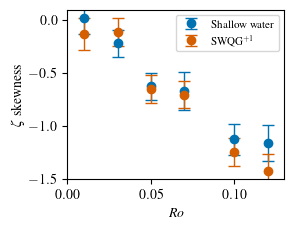

In [13]:
sw_mean = np.mean(SW_zeta_skew_mat,axis=0)
sw_std = np.std(SW_zeta_skew_mat,axis=0)/np.sqrt(10)
QG_mean = np.mean(P1_zeta_skew_mat,axis=0)
QG_std = np.std(P1_zeta_skew_mat,axis=0)/np.sqrt(10)

fig=plt.figure(figsize=(2.8, 2.2))
plt.errorbar(Ro_ary, sw_mean, yerr=sw_std, fmt='o', capsize=4, label="Shallow water")
plt.errorbar(Ro_ary, QG_mean, yerr=QG_std, fmt='o', capsize=4, label="SWQG$^{+1}$")
plt.xlim([0,0.13]); plt.ylim([-1.5,0.1])
plt.xlabel("$Ro$"); plt.ylabel("$\zeta$ skewness")
plt.legend()

figname = 'figs/Rosweep_zetaskew'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

plt.show()

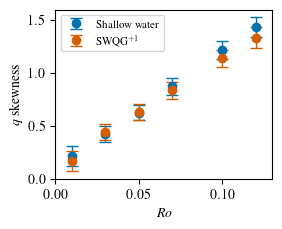

In [15]:
sw_mean = np.mean(SW_q_skew_mat,axis=0)
sw_std = np.std(SW_q_skew_mat,axis=0)/np.sqrt(10)
QG_mean = np.mean(P1_q_skew_mat,axis=0)
QG_std = np.std(P1_q_skew_mat,axis=0)/np.sqrt(10)

fig=plt.figure(figsize=(2.8, 2.2))
plt.errorbar(Ro_ary, sw_mean, yerr=sw_std, fmt='o', capsize=4,label="Shallow water")
plt.errorbar(Ro_ary, QG_mean, yerr=QG_std, fmt='o', capsize=4, label="SWQG$^{+1}$")
plt.xlim([0,0.13]); plt.ylim([0,1.6])
plt.xlabel("$Ro$"); plt.ylabel("$q$ skewness")
plt.legend()

figname = 'figs/Rosweep_qskew'
figname = figname.replace(".", "d" ); figname = figname+'.pdf'
plt.savefig(figname, bbox_inches='tight')

plt.show()